# AirBnB Listings and Reviews

## Analysis: Can you spot any major differences in the Airbnb market between cities?

Data for this workbook can be found on [HERE](https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews)

### Data Cleaning and Optimization

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [75]:
listings = pd.read_csv('Listings.csv', encoding='latin1')
reviews = pd.read_csv('Reviews.csv')

In [76]:
listings['accommodates']

0         2
1         2
2         2
3         2
4         2
         ..
279707    2
279708    2
279709    2
279710    2
279711    2
Name: accommodates, Length: 279712, dtype: int64

In [8]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [30]:
def val_to_bool(val):
    if val == 't':
        return True
    elif val == 'f':
        return False
    else: return val

In [77]:
listings['host_is_superhost'] = listings['host_is_superhost'].apply(val_to_bool).astype('bool')
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].apply(val_to_bool).astype('bool')
listings['host_identity_verified'] = listings['host_identity_verified'].apply(val_to_bool).astype('bool')
listings['instant_bookable'] = listings['instant_bookable'].apply(val_to_bool).astype('bool')

In [78]:
listings[['neighbourhood',
       'district', 'city','property_type','room_type']] = listings[['neighbourhood',
       'district', 'city','property_type','room_type']].astype('category')

In [81]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   listing_id                   279712 non-null  int64   
 1   name                         279539 non-null  object  
 2   host_id                      279712 non-null  int64   
 3   host_since                   279547 non-null  object  
 4   host_location                278872 non-null  object  
 5   host_response_time           150930 non-null  object  
 6   host_response_rate           150930 non-null  float64 
 7   host_acceptance_rate         166625 non-null  float64 
 8   host_is_superhost            279712 non-null  bool    
 9   host_total_listings_count    279547 non-null  float64 
 10  host_has_profile_pic         279712 non-null  bool    
 11  host_identity_verified       279712 non-null  bool    
 12  neighbourhood                279712 non-null

In [82]:
#merge listings and reviews data frame
df = pd.merge(listings, reviews, on = "listing_id")
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,review_id,date,reviewer_id
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,False,173279221,2017-07-23,3501898
1,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,False,172657766,2017-07-21,74346703
2,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,False,20792760,2014-10-05,21583508
3,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,False,32282670,2015-05-16,32285553
4,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,False,45645391,2015-09-04,34310199


In [83]:
df['bedrooms'].isna().sum()

541413

In [84]:
df['bedrooms'] = df['bedrooms'].fillna(1)

In [85]:
df['bedrooms'].isna().sum()

0

### Data Analysis

#### Check the differences based on cleanliness

In [90]:
clean =df.groupby('city',as_index = False)['review_scores_cleanliness'].mean().sort_values('review_scores_cleanliness',ascending=False)
clean

,city,review_scores_cleanliness
1,Cape Town,9.716712
4,Mexico City,9.683151
8,Rome,9.583323
7,Rio de Janeiro,9.546794
0,Bangkok,9.538680
9,Sydney,9.523461
5,New York,9.465299
6,Paris,9.340597
3,Istanbul,9.323710
2,Hong Kong,9.255236


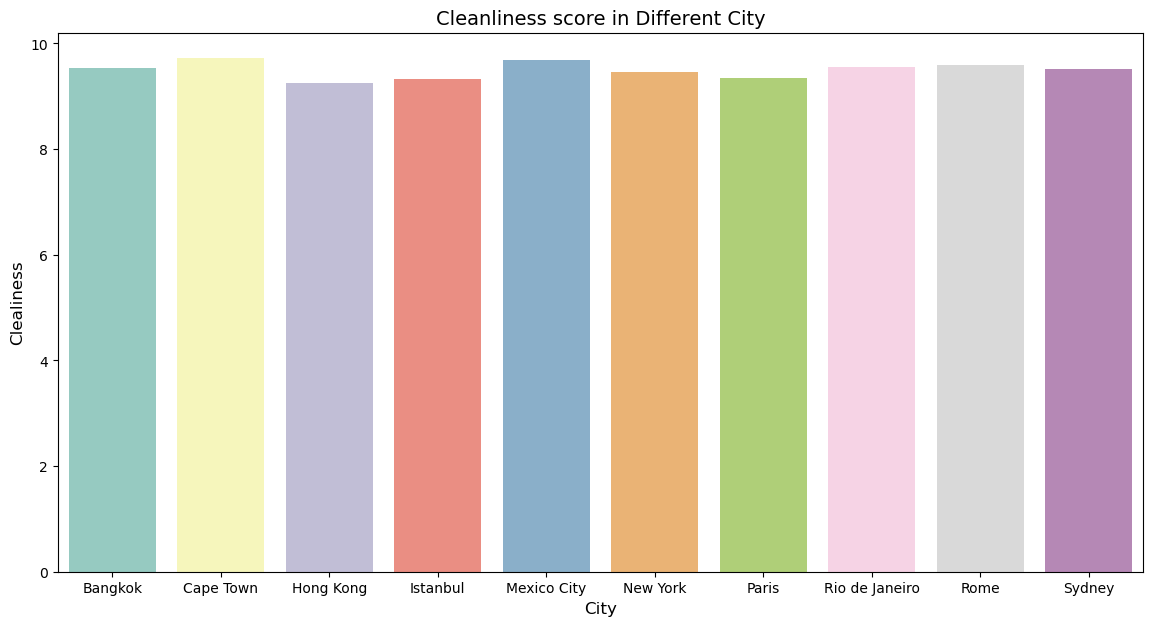

In [95]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=clean['city'], y=clean['review_scores_cleanliness'], palette='Set3')
plt.xlabel('City', fontsize=12)
plt.ylabel('Clealiness', fontsize=12)
plt.title('Cleanliness score in Different City', fontsize=14)
plt.savefig('Clean_in_City')

##### Conclusion: No major differences was found in the cleanliness score between the cities

#### Check the differences based on number of bedrooms

In [97]:
bedroom=df.groupby('city', as_index = False)['bedrooms'].mean().sort_values(by = 'bedrooms',ascending=False)
bedroom

,city,bedrooms
1,Cape Town,1.661873
7,Rio de Janeiro,1.488867
4,Mexico City,1.487125
9,Sydney,1.476912
3,Istanbul,1.447877
8,Rome,1.443821
0,Bangkok,1.379374
6,Paris,1.314923
5,New York,1.291571
2,Hong Kong,1.274674


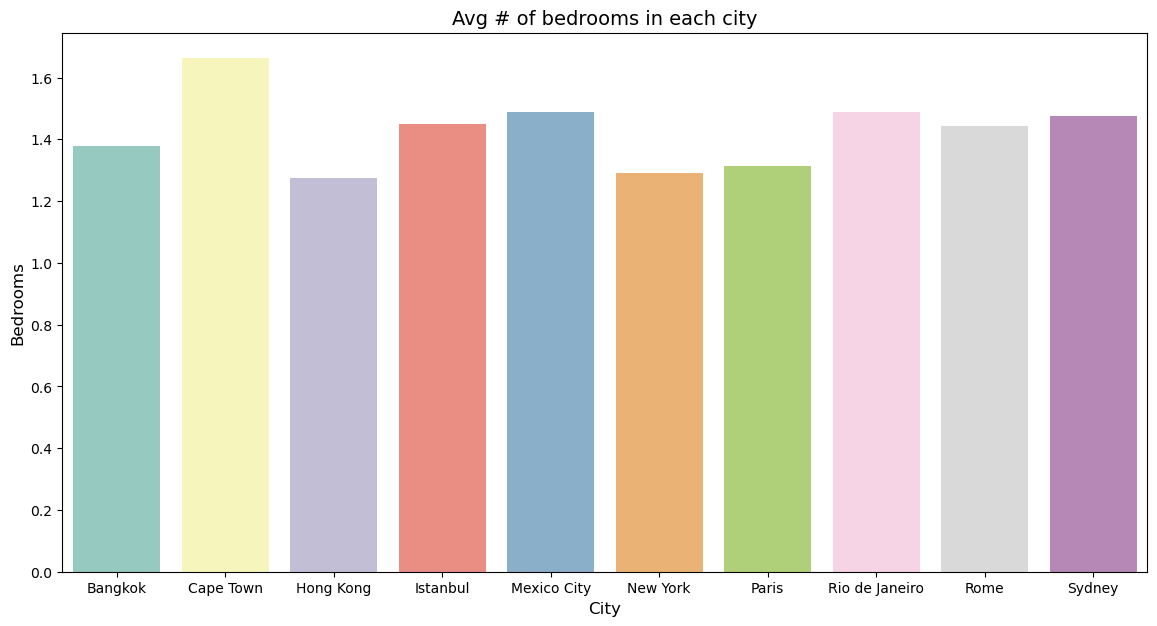

In [98]:
plt.figure(figsize=(14,7))
ax2 = sns.barplot(x=bedroom['city'], y=bedroom['bedrooms'], palette='Set3')
plt.xlabel('City', fontsize=12)
plt.ylabel('Bedrooms', fontsize=12)
plt.title('Avg # of bedrooms in each city', fontsize=14)
plt.savefig('Bedrooms_in_City')

##### Conclusion: No major differences was found in the number of bedrooms between the cities

#### Check the differences based on being instant bookable

In [101]:
bookable=df.groupby("city", as_index = False)['instant_bookable'].count().sort_values(by = 'instant_bookable',ascending=False)
bookable

,city,instant_bookable
6,Paris,1213727
8,Rome,1113360
5,New York,847727
9,Sydney,482552
4,Mexico City,477584
7,Rio de Janeiro,323274
1,Cape Town,302336
0,Bangkok,284342
3,Istanbul,194013
2,Hong Kong,134228


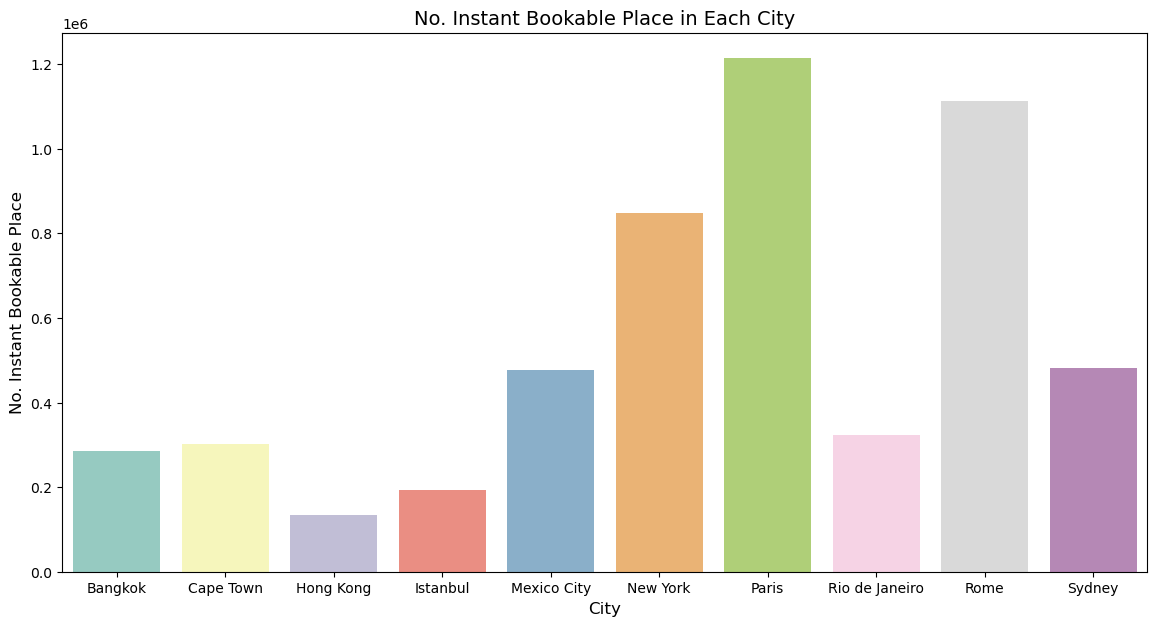

In [102]:
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=bookable['city'], y=bookable['instant_bookable'], palette='Set3')
plt.xlabel('City', fontsize=12)
plt.ylabel('No. Instant Bookable Place', fontsize=12)
plt.title('No. Instant Bookable Place in Each City', fontsize=14)
plt.savefig('instant_book_city')

Major differences in the Airbnb market between cities fount in instant bookable field. Paris and Rome are the two cities that has the most places that as enabled instant bookabled. 